In [4]:
from torch import nn
import torch
import seaborn as sns

In [2]:
loss_func = nn.KLDivLoss(reduction='batchmean')

In [6]:
targets = torch.empty(1, 2).fill_(0.5)

In [17]:
n = 101
k = torch.linspace(0, 1, n).reshape(n, 1)

In [44]:
probs = torch.cat([k, 1-k], dim=1)
log_probs = torch.log(probs)

In [45]:
loss = torch.tensor([loss_func(log_probs[[i]], targets).item() for i in range(n)])

In [46]:
max(loss)

tensor(inf)

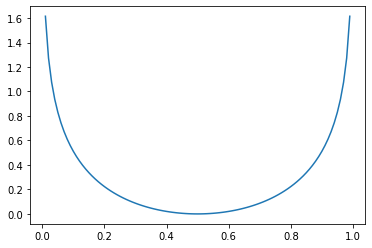

In [47]:
sns.lineplot(k.flatten(), loss)

## Restricting the range of KL loss

In [49]:
probs = torch.cat([k, 1-k], dim=1)
log_probs = torch.log(torch.clamp(probs, 0.2, 0.8))

In [50]:
loss = torch.tensor([loss_func(log_probs[[i]], targets).item() for i in range(n)])

In [51]:
max(loss)

tensor(0.2231)

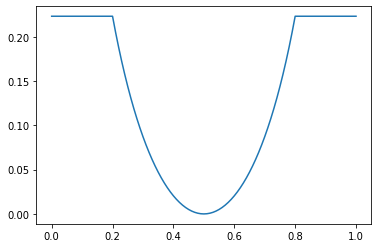

In [52]:
sns.lineplot(k.flatten(), loss)